## Inverse Cooking: Recipe Generation from Food Images

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import os
from args import get_parser
import pickle
from model import get_model
from torchvision import transforms
from utils.output_utils import prepare_output
from PIL import Image
import time

Set ```data_dir``` to the path including vocabularies and model checkpoint

In [2]:
data_dir = '../data'

In [3]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = False
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'

In [4]:
# code below was used to save vocab files so that they can be loaded without Vocabulary class
#ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_ingrs.pkl'), 'rb'))
#ingrs_vocab = [min(w, key=len) if not isinstance(w, str) else w for w in ingrs_vocab.idx2word.values()]
#vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_toks.pkl'), 'rb')).idx2word
#pickle.dump(ingrs_vocab, open('../demo/ingr_vocab.pkl', 'wb')) ingredients
#pickle.dump(vocab, open('../demo/instr_vocab.pkl', 'wb')) instructions

ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'ingr_vocab.pkl'), 'rb'))
vocab = pickle.load(open(os.path.join(data_dir, 'instr_vocab.pkl'), 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

In [5]:
print (instrs_vocab_size, ingr_vocab_size)

23231 1488


In [6]:

t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
# print(model.state_dict())
# print(model.state_dict())
model_path = os.path.join(data_dir, 'modelbest.ckpt')
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)
print('Load Pretrained Model')
print('+---------------------------+')
print('| Load State Dictionary     |')
print('|    from Checkpoint File   |')
print('+---------------------------+')
print('        |')
print('+---------------------------+')
print('|  Move Model to Specified  |')
print('|      Device for Inference |')
print('+---------------------------+')
print('        |')
print('+---------------------------+')
print('|   Set Model to Evaluation |')
print('|            Mode           |')
print('+---------------------------+')



c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 1.4010326862335205
Load Pretrained Model
+---------------------------+
| Load State Dictionary     |
|    from Checkpoint File   |
+---------------------------+
        |
+---------------------------+
|  Move Model to Specified  |
|      Device for Inference |
+---------------------------+
        |
+---------------------------+
|   Set Model to Evaluation |
|            Mode           |
+---------------------------+


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


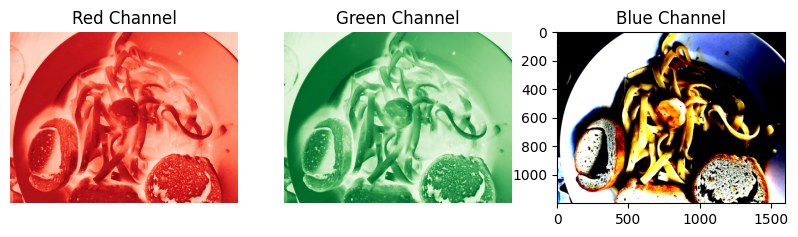

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


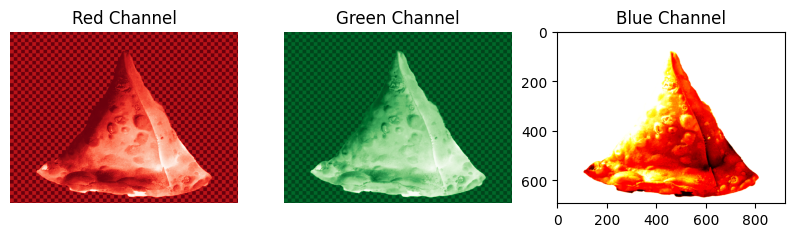

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


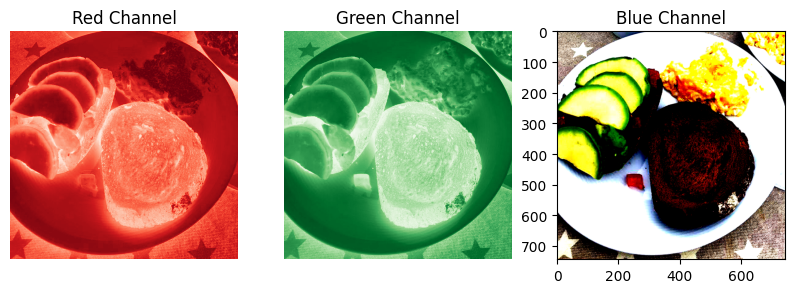

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


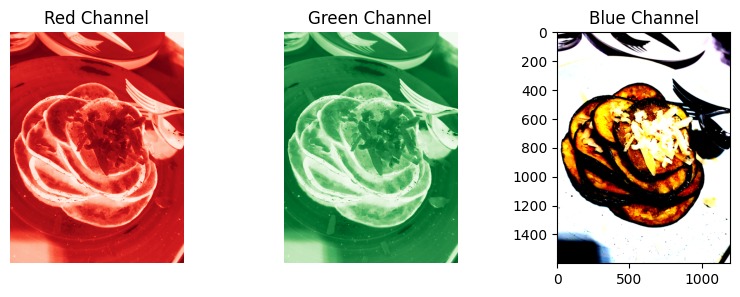

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


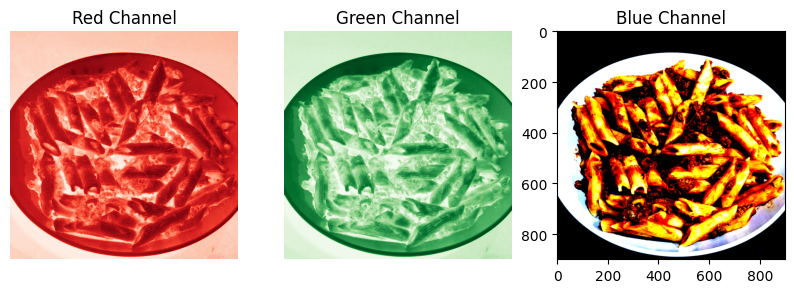

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


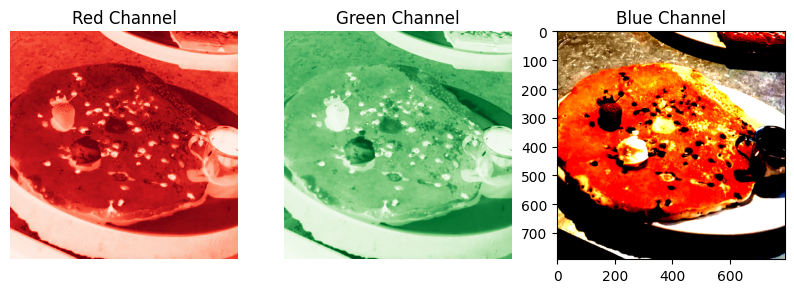

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


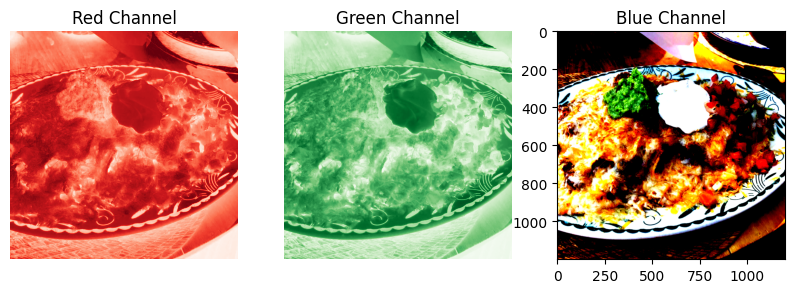

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


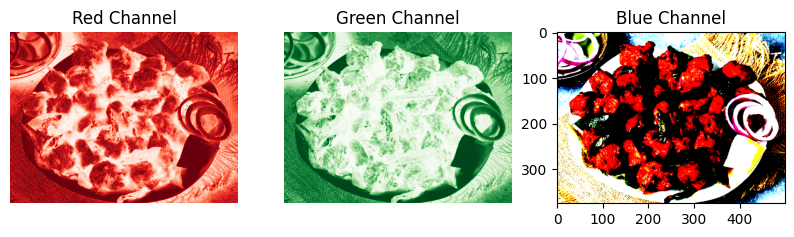

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


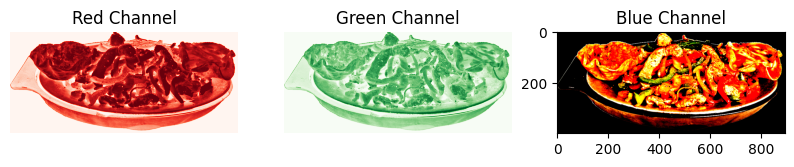

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


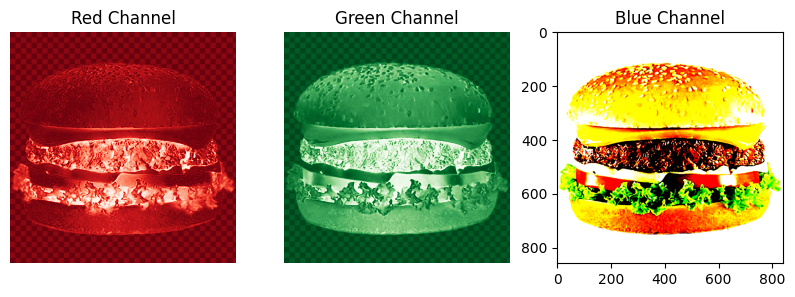

In [7]:


# Set model to evaluation mode
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

# print(to_input_transf)
# print(transf_list_batch)

# Apply the transformations to the image
image_folder = os.path.join(data_dir, 'demo_imgs')
demo_imgs = os.listdir(image_folder)

# class EncoderCNN(nn.Module):
#     def __init__(self, embed_size, dropout=0.5, image_model='resnet101', pretrained=True):
#         """Load the pretrained ResNet-152 and replace top fc layer."""
#         super(EncoderCNN, self).__init__()
#         resnet = globals()[image_model](pretrained=pretrained)
#         modules = list(resnet.children())[:-2]  # delete the last fc layer.
#         self.resnet = nn.Sequential(*modules)

#         self.linear = nn.Sequential(nn.Conv2d(resnet.fc.in_features, embed_size, kernel_size=1, padding=0),
#                                     nn.Dropout2d(dropout))

#     def forward(self, images, keep_cnn_gradients=False):
#         """Extract feature vectors from input images."""

#         if keep_cnn_gradients:
#             raw_conv_feats = self.resnet(images)
#         else:
#             with torch.no_grad():
#                 raw_conv_feats = self.resnet(images)
#         features = self.linear(raw_conv_feats)
#         features = features.view(features.size(0), features.size(1), -1)

#         return features
# encoder = EncoderCNN()


for img_name in demo_imgs:
    # Load the image
#     with torch.no_grad():
#         features = encoder(demo_imgs)

# # Visualize the output features
#     fig, axs = plt.subplots(4, 4, figsize=(16, 16))
#     for i in range(4):
#         for j in range(4):
#             axs[i, j].imshow(features[0, i*4+j].detach().numpy())
#     plt.show()
    image_path = os.path.join(image_folder, img_name)
    image = Image.open(image_path).convert('RGB')
    # print(image)
    
    # Apply the transformations
    image_tensor = to_input_transf(image)
    # print(image_tensor)

    image = np.array(image_tensor.permute(1, 2, 0))

# # compute histogram of pixel values
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 255))

    # display RGB channels
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
    axs[0].imshow(image[:,:,0], cmap='Reds')
    axs[0].set_title('Red Channel')
    axs[0].axis('off')
    axs[1].imshow(image[:,:,1], cmap='Greens')
    axs[1].set_title('Green Channel')
    axs[1].axis('off')
    axs[2].imshow(image[:,:,2], cmap='Blues')
    axs[2].set_title('Blue Channel')
    axs[2].axis('off')

    # display histogram
    # fig, ax = plt.subplots(figsize=(8, 6))
    # ax.hist(image.flatten(), bins=256, range=(0, 255), color='red')
    # ax.set_xlabel('Pixel Value', fontsize=12)
    # ax.set_ylabel('Frequency', fontsize=12)
    # ax.set_title('Histogram of Pixel Values', fontsize=14)
    # ax.grid(True)
    # plt.style.use('seaborn-darkgrid')
    # plt.show()


    plt.imshow(image_tensor.permute(1, 2, 0))
    plt.axis('on')
    plt.show()


In [8]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

print("greedy:", greedy)
print("beam:", beam)
print("temperature:", temperature)
print("numgens:", numgens)

greedy: [True, False, False, False]
beam: [-1, -1, -1, -1]
temperature: 1.0
numgens: 4


Set ```use_urls = True``` to get recipes for images in ```demo_urls```. 

You can also set ```use_urls = False``` and get recipes for images in the path in ```data_dir/test_imgs```.

In [9]:
import requests
from io import BytesIO
import random
from collections import Counter
use_urls = False #set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid
image_folder = os.path.join(data_dir, 'demo_imgs')

if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://kfoods.com/images1/newrecipeicon/Sada-chawal_1071.jpg']

demo_files = demo_urls if use_urls else demo_imgs

In [10]:
# from torchvision.models import resnet101
# class EncoderCNN(nn.Module):
#     def __init__(self, embed_size, dropout=0.5, image_model='resnet101', pretrained=True):
#         """Load the pretrained ResNet-152 and replace top fc layer."""
#         super(EncoderCNN, self).__init__()
#         resnet = globals()[image_model](pretrained=pretrained)
#         modules = list(resnet.children())[:-2]  # delete the last fc layer.
#         self.resnet = nn.Sequential(*modules)

#         self.linear = nn.Sequential(nn.Conv2d(resnet.fc.in_features, embed_size, kernel_size=1, padding=0),
#                                     nn.Dropout2d(dropout))
#         print(self.linear)
#         print(resnet)

#     def forward(self, demo_imgs, keep_cnn_gradients=False):
#         """Extract feature vectors from input images."""

#         if keep_cnn_gradients:
#             raw_conv_feats = self.resnet(demo_imgs)
#         else:
#             with torch.no_grad():
#                 raw_conv_feats = self.resnet(demo_imgs)
#         features = self.linear(raw_conv_feats)
#         features = features.view(features.size(0), features.size(1), -1)
#         print(features)

#         return features
# def image_summary(self, mode, epoch, demo_imgs):
#         images = vutils.make_grid(images, normalize=True, scale_each=True)
#         self.writer.add_image('{}/Image'.format(mode), demo_imgs, epoch)

In [11]:
from modules.encoder import EncoderCNN, EncoderLabels
from modules.transformer_decoder import DecoderTransformer
from utils.metrics import softIoU, MaskedCrossEntropyCriterion
def get_model(args, ingr_vocab_size, instrs_vocab_size):

    # build ingredients embedding
    encoder_ingrs = EncoderLabels(args.embed_size, ingr_vocab_size,
                                  args.dropout_encoder, scale_grad=False).to(device)
    print(encoder_ingrs)
    # build image model
    encoder_image = EncoderCNN(args.embed_size, args.dropout_encoder, args.image_model)
    print(encoder_image)

    decoder = DecoderTransformer(args.embed_size, instrs_vocab_size,
                                 dropout=args.dropout_decoder_r, seq_length=args.maxseqlen,
                                 num_instrs=args.maxnuminstrs,
                                 attention_nheads=args.n_att, num_layers=args.transf_layers,
                                 normalize_before=True,
                                 normalize_inputs=False,
                                 last_ln=False,
                                 scale_embed_grad=False)
    print(decoder)
    ingr_decoder = DecoderTransformer(args.embed_size, ingr_vocab_size, dropout=args.dropout_decoder_i,
                                      seq_length=args.maxnumlabels,
                                      num_instrs=1, attention_nheads=args.n_att_ingrs,
                                      pos_embeddings=False,
                                      num_layers=args.transf_layers_ingrs,
                                      learned=False,
                                      normalize_before=True,
                                      normalize_inputs=True,
                                      last_ln=True,
                                      scale_embed_grad=False)
    # recipe loss
    criterion = MaskedCrossEntropyCriterion(ignore_index=[instrs_vocab_size-1], reduce=False)
    print(criterion)

    # ingredients loss
    label_loss = nn.BCELoss(reduce=False)
    print(label_loss)
    eos_loss = nn.BCELoss(reduce=False)
    print(eos_loss)

    return model


In [12]:
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
        plt.imshow(image)
        plt.show()
    
    transf_list = []
    transf_list.append(transforms.Resize(256))
    transf_list.append(transforms.CenterCrop(224))
    transform = transforms.Compose(transf_list)
    # print(transform)
    
    image_transf = transform(image)
    image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)

    # print('transf_list:', transf_list)
    # print('transform:', transform)
    # print('image_transf:', image_transf)
    # print('image_tensor:', image_tensor)

    
    plt.imshow(image_transf)
    plt.axis('off')
    plt.show()
    plt.close()
    criterion = MaskedCrossEntropyCriterion(ignore_index=[instrs_vocab_size-1], reduce=False)

    num_valid = 1
    for i in range(numgens):
        with torch.no_grad():
            outputs = model.sample(image_tensor, greedy=greedy[i], 
                                   temperature=temperature, beam=beam[i], true_ingrs=None)  
            
            # print(outputs)
            #print(f"outputs for iteration {i}: {outputs}")
            
        ingr_ids = outputs['ingr_ids'].cpu().numpy()
        # print(ingr_ids)
        recipe_ids = outputs['recipe_ids'].cpu().numpy()
        
        
        outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
        # print(valid) #score
        print("Accuracy:", valid['score'] * 100)
        # print(outs)
        # loss = criterion(outputs['instrs_vocab_size-1'], recipe_ids)
        # print(loss)
        if valid['is_valid'] or show_anyways:
                #   num_correct = 0
                #   num_total = 0

                #   print(outs.keys())
                #   print(outs)
        # for ingr_id in valid['ingr_ids']:
        #     if 'ingr_ids' in outs:
        #      gt_ingrs = valid['ingrs']
        #      pred_ingrs = outs['ingrs']
        #      num_correct += len(set(gt_ingrs) & set(pred_ingrs))
        #      num_total += len(gt_ingrs)
        #     accuracy = num_correct / num_total
           
            # num_correct = 0
            # num_total = 0
            # # Calculate accuracy
            # gt_ingrs = set(valid['ingrs'])
            # pred_ingrs = set(outs['ingrs'])
            # num_correct += len(set(gt_ingrs) & set(pred_ingrs))
            # num_total += len(gt_ingrs) 
            print ('RECIPE', num_valid)
            num_valid+=1
            # print ("greedy:", greedy[i], "beam:", beam[i])
    
            BOLD = '\033[1m'
            END = '\033[0m'
            print (BOLD + '\nTitle:' + END,outs['title'])

            print (BOLD + '\nIngredients:'+ END)
            print (', '.join(outs['ingrs']))

            print (BOLD + '\nInstructions:'+END)
            print ('-'+'\n-'.join(outs['recipe']))

            print ('='*20)
        # print('Accuracy: {:.2f}%'.format(accuracy * 100))
        
            


        

ConnectionError: HTTPSConnectionPool(host='kfoods.com', port=443): Max retries exceeded with url: /images1/newrecipeicon/Sada-chawal_1071.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001ED02CCCC10>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))